<a href="https://colab.research.google.com/github/thequickbrownfoxjumpedoverthelazydog/2022-HiMCM-Python-Models/blob/main/Python%20Models/PPMandTemperatureRealtionship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['2022_HiMCM_Data.csv']))

df.head()

Saving 2022_HiMCM_Data.csv to 2022_HiMCM_Data.csv


,Year,PPM,Degrees C
0,1959.0,315.98,0.03
1,1960.0,316.91,-0.03
2,1961.0,317.64,0.06
3,1962.0,318.45,0.03
4,1963.0,318.99,0.05


In [ ]:
df = df.drop("Year", axis=1)

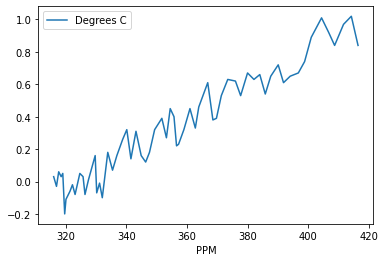

In [ ]:
df.plot(x="PPM", y="Degrees C")

In [ ]:
df = df.drop(63, axis=0)
df.tail()

,PPM,Degrees C
58,406.76,0.92
59,408.72,0.84
60,411.66,0.97
61,414.24,1.02
62,416.45,0.84


In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15,)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
acc = model.score(x_test, y_test)
acc

0.9380215100569216

In [ ]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(model, x_test, y_test, cv=10)

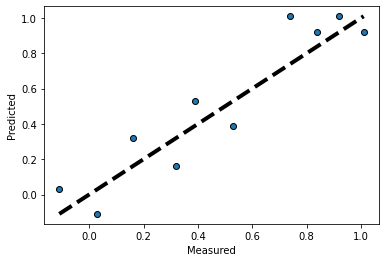

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
search_grid={'n_estimators':[250],'learning_rate':[.01],'max_depth':[4],'subsample':[.75],'random_state':[1]}
model2 = GradientBoostingRegressor()
model2_cv = GridSearchCV(model2, param_grid=search_grid, cv=5)

model2_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01], 'max_depth': [4],
                         'n_estimators': [250], 'random_state': [1],
                         'subsample': [0.75]})

In [ ]:
acc = model2_cv.score(x_test, y_test)
print(acc)

0.9326092017770279


In [ ]:
uploaded2 = files.upload()

	
df2 = pd.read_csv(io.BytesIO(uploaded2['2022_HiMCM_Data.csv']))

df2.head()

Saving 2022_HiMCM_Data.csv to 2022_HiMCM_Data.csv


,Year,PPM,Degrees C
0,1959.0,315.98,0.03
1,1960.0,316.91,-0.03
2,1961.0,317.64,0.06
3,1962.0,318.45,0.03
4,1963.0,318.99,0.05


In [ ]:
df2 = df2.drop(63, axis=0)
df2.tail()

,Year,PPM,Degrees C
58,2017.0,406.76,0.92
59,2018.0,408.72,0.84
60,2019.0,411.66,0.97
61,2020.0,414.24,1.02
62,2021.0,416.45,0.84


In [ ]:
from sklearn.model_selection import train_test_split
X2 = df2.iloc[:, :-1].values
Y2 = df2.iloc[:, -1].values
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.15)

In [ ]:
from sklearn.linear_model import LinearRegression

multiDataModel = LinearRegression()
multiDataModel.fit(x_train2, y_train2)

LinearRegression()

In [ ]:
acc = multiDataModel.score(x_test2, y_test2)
acc

0.922731834761574

In [ ]:
multiDataModel.predict([ [2050, 406] ])

array([0.55393149])

In [ ]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(multiDataModel, x_test2, y_test2, cv=10)

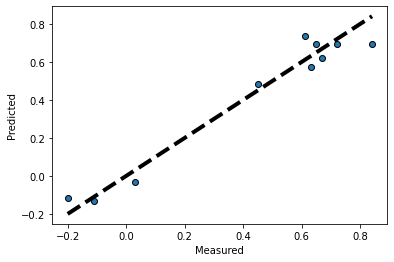

In [ ]:
from matplotlib import pyplot as plt
fig2, ax2 = plt.subplots()
ax2.scatter(y_test2, predicted, edgecolors=(0, 0, 0))
ax2.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=4)
ax2.set_xlabel('Measured')
ax2.set_ylabel('Predicted')
plt.show()

In [ ]:
X3 = df2[["Year", "Degrees C"]].values
Y3 = df2[["PPM"]].values
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.15)

In [ ]:
ppmModel = LinearRegression()
ppmModel.fit(x_train3, y_train3)

LinearRegression()

In [ ]:
acc = ppmModel.score(x_test3, y_test3)
acc

0.9814622710806565

In [ ]:
predictedPPM = cross_val_predict(ppmModel, x_test3, y_test3, cv=10)

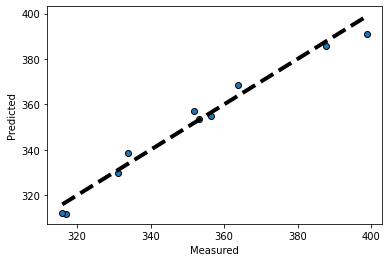

In [ ]:
fig2, ax3 = plt.subplots()
ax3.scatter(y_test3, predictedPPM, edgecolors=(0, 0, 0))
ax3.plot([y_test3.min(), y_test3.max()], [y_test3.min(), y_test3.max()], 'k--', lw=4)
ax3.set_xlabel('Measured')
ax3.set_ylabel('Predicted')
plt.show()

In [ ]:
ppmModel.predict([ [2050, -0.3] ])

array([[426.66492065]])

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [ ]:
accur = linear.score(x_test, y_test)
accur

0.9291706553478765

In [ ]:
print(linear.coef_)
print(linear.intercept_)

[0.01053946]
-3.41226004647013


In [ ]:
# f(x) gives Temperature, x is PPM
# f(x) = 0.01058211x - 3.4345

In [ ]:
preds = linear.predict(x_test)
preds

array([-0.01665696,  0.02023115,  0.9768979 ,  0.12278009,  0.10623314,
       -0.07219991, -0.04363797,  0.42283851,  0.39216868,  0.18675461])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.9291706553478765

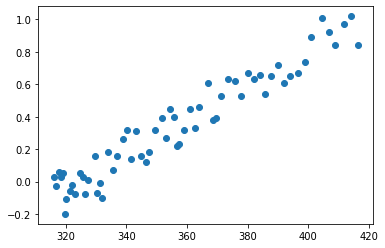

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(250, 600,100)
y = 0.01058211*x - 3.4345

fig, ax = plt.subplots()
# ax.plot(x, y)
ax.scatter(X, Y)